In [1]:
import math

import jupyter_cadquery as jcq
from jupyter_cadquery.replay import show

from build123d import *

Overwriting auto display for cadquery Workplane and Shape


In [2]:
jcq.set_defaults(
    control="orbit",
    axes=True,
    axes0=True,
    grid=(True, False, False),
    glass=True,
    theme="browser",
)

In [3]:
%%html
<style>
/* Fix widget background color in VS Code */
.cell-output-ipywidget-background {
   background-color: transparent !important;
}
</style>

In [4]:
def superellipse(r, n=2.5, step=100):
    na = 2 / n
    piece = (math.pi * 2) / step

    def sgn(x):
        return ((x > 0) - (x < 0)) * 1

    pts = []
    for t in map(lambda t: t * piece, range(step + 1)):
        x = (abs((math.cos(t))) ** na) * sgn(math.cos(t)) * r
        y = (abs((math.sin(t))) ** na) * sgn(math.sin(t)) * r
        pts.append((x, y))
    return pts

In [5]:
with BuildPart() as superellipse_test:
    with BuildSketch():
        with BuildLine():
            Spline(superellipse(90/2+2+1))
        MakeFace()
    Extrude(amount=0.2)
show(superellipse_test.part)

CadViewerWidget(anchor=None, cad_width=800, glass=True, height=600, pinning=False, theme='browser', title=None…


*******************************************************************
******        Statistics on Transfer (Write)                 ******

*******************************************************************
******        Transfer Mode = 0  I.E.  As Is       ******
******        Transferring Shape, ShapeType = 2                      ******
** WorkSession : Sending all data
 Step File Name : /tmp/x.step(618 ents)  Write  Done


<IFSelect_ReturnStatus.IFSelect_RetDone: 1>

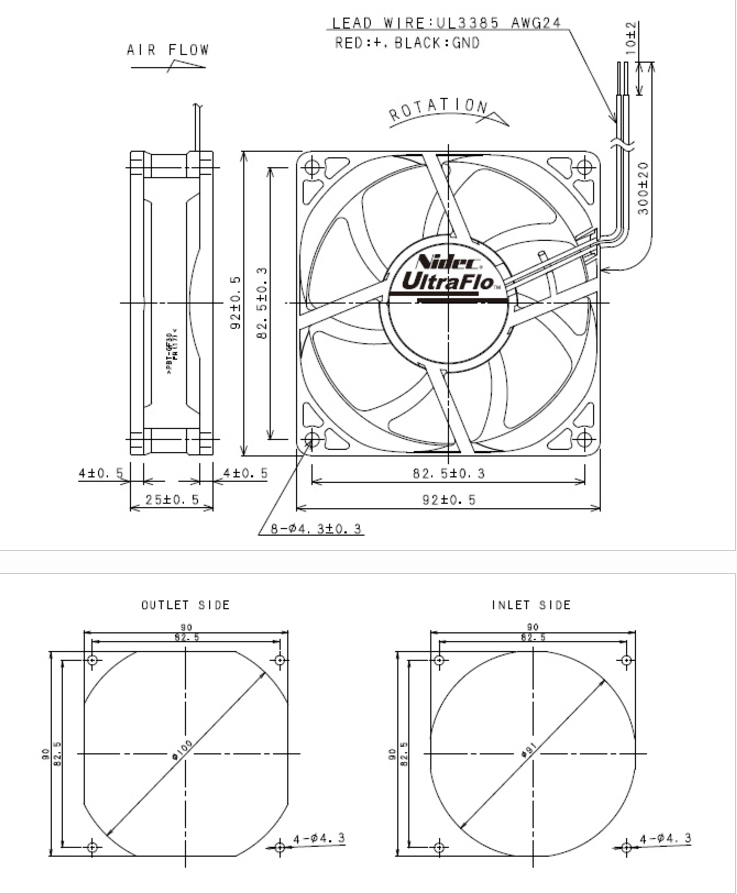

D of the OUTER circle = 100

`superellipse(90/2+2)` with `+2` can cover it

In [6]:
panel_x = 200
panel_y = 200
panel_thickness = 3

screw_y_padding = 9
screw_x_padding = 10
screw_head_r = (5.5 + 0.5) / 2
screw_head_h = 2
screw_head_ext_depth = 0.5
screw_r = (3 + 1) / 2

cpu_socket_size = 75  # 115x colling screw hole
cpu_socket_left_margin = 55.5
cpu_socket_right_margin = 69.5
cpu_socket_top_margin = 48.5
cpu_socket_bottom_margin = 76.5
assert(cpu_socket_left_margin+cpu_socket_size+cpu_socket_right_margin == panel_x)
assert(cpu_socket_top_margin+cpu_socket_size+cpu_socket_bottom_margin == panel_y)
center_of_fan_hole = (
    cpu_socket_left_margin + cpu_socket_size / 2 - panel_x / 2,
    cpu_socket_top_margin + cpu_socket_size / 2 - panel_y / 2,
)
fan_cover_wall_thickness = 1
fan_hole_superellipse_r = 90/2+2+fan_cover_wall_thickness

screws_pos = [
    (-panel_x / 2 + screw_x_padding, panel_y / 2 - screw_y_padding),
    (panel_x / 2 - screw_x_padding, panel_y / 2 - screw_y_padding),
    (panel_x / 2 - screw_x_padding, -panel_y / 2 + screw_y_padding),
    (-panel_x / 2 + screw_x_padding, -panel_y / 2 + screw_y_padding),
]

with BuildPart() as panel:
    Box(panel_x, panel_y, panel_thickness)
    # add Z to pos
    with Locations(*map(lambda p: p + (panel_thickness / 2 - screw_head_ext_depth,), screws_pos)):
        CounterSinkHole(screw_r, screw_head_r, panel_thickness)
    with BuildSketch(-Plane.XY * Location(center_of_fan_hole)):
        with BuildLine():
            pts = superellipse(fan_hole_superellipse_r)
            Spline(pts)
        MakeFace()
    Extrude(amount=panel_thickness, both=True,mode=Mode.SUBTRACT)

show(panel.part)
panel.part.export_step("/tmp/panel.step")

CadViewerWidget(anchor=None, cad_width=800, glass=True, height=600, pinning=False, theme='browser', title=None…


*******************************************************************
******        Statistics on Transfer (Write)                 ******

*******************************************************************
******        Transfer Mode = 0  I.E.  As Is       ******
******        Transferring Shape, ShapeType = 0                      ******
** WorkSession : Sending all data
 Step File Name : /tmp/panel.step(5993 ents)  Write  Done


<IFSelect_ReturnStatus.IFSelect_RetDone: 1>

In [7]:
fan_cover_flange = 1
fan_cover_flange_thickness = 0.5

with BuildPart() as fan_cover:
    with BuildSketch():
        with BuildLine():
            pts = superellipse(fan_hole_superellipse_r)
            Spline(pts)
        MakeFace()
        with BuildLine():
            pts = superellipse(fan_hole_superellipse_r - fan_cover_wall_thickness)
            Spline(pts)
        MakeFace(mode=Mode.SUBTRACT)
    Extrude(amount=panel_thickness)
    with BuildSketch():
        with BuildLine():
            pts = superellipse(fan_hole_superellipse_r + fan_cover_flange)
            Spline(pts)
        MakeFace()
    Extrude(amount=-fan_cover_flange_thickness)
show(fan_cover.part)
fan_cover.part.export_step("/tmp/fan_cover.step")

CadViewerWidget(anchor=None, cad_width=800, glass=True, height=600, pinning=False, theme='browser', title=None…


*******************************************************************
******        Statistics on Transfer (Write)                 ******

*******************************************************************
******        Transfer Mode = 0  I.E.  As Is       ******
******        Transferring Shape, ShapeType = 0                      ******
** WorkSession : Sending all data
 Step File Name : /tmp/fan_cover.step(1798 ents)  Write  Done


<IFSelect_ReturnStatus.IFSelect_RetDone: 1>

In [8]:
with BuildPart() as fan_cover_modifier:
    with BuildSketch():
        with BuildLine():
            pts = superellipse(fan_hole_superellipse_r - fan_cover_wall_thickness)
            Spline(pts)
        MakeFace()
    Extrude(amount=fan_cover_flange_thickness)
show(fan_cover_modifier.part)
fan_cover_modifier.part.export_step("/tmp/fan_cover_modifier.step")

CadViewerWidget(anchor=None, cad_width=800, glass=True, height=600, pinning=False, theme='browser', title=None…


*******************************************************************
******        Statistics on Transfer (Write)                 ******

*******************************************************************
******        Transfer Mode = 0  I.E.  As Is       ******
******        Transferring Shape, ShapeType = 2                      ******
** WorkSession : Sending all data
 Step File Name : /tmp/fan_cover_modifier.step(618 ents)  Write  Done


<IFSelect_ReturnStatus.IFSelect_RetDone: 1>